# Library import

In [1]:
import tensorflow as tf #type: ignore
from tensorflow import keras #type: ignore
from tensorflow.keras.models import Sequential #type: ignore
from tensorflow.keras.layers import Activation , Dense , Flatten, Conv2D, MaxPool2D #type: ignore
from tensorflow.keras.optimizers import Adam #type: ignore
from tensorflow.keras.metrics import categorical_crossentropy #type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator #type: ignore
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #type: ignore
import matplotlib.pyplot as plt #type: ignore
import os
import shutil
import random
import glob
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
os.chdir('D:\Projects\WorkSpace\Deep Learning\cat-vs-dog\data\dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')

for c in random.sample(glob.glob('cat*'), 500):
    shutil.move(c, 'train/cat')
for c in random.sample(glob.glob('dog*'), 500):
    shutil.move(c, 'train/dog')
for c in random.sample(glob.glob('cat*'), 100):
    shutil.move(c, 'valid/cat')
for c in random.sample(glob.glob('dog*'), 100):
    shutil.move(c, 'valid/dog')
for c in random.sample(glob.glob('cat*'), 50):
    shutil.move(c, 'test/cat')
for c in random.sample(glob.glob('dog*'), 50):
    shutil.move(c, 'test/dog')

ValueError: Sample larger than population or is negative

In [3]:
train_path= 'D:/Projects/WorkSpace/Deep Learning/cat-vs-dog/data/dogs-vs-cats/train'
valid_path= 'D:/Projects/WorkSpace/Deep Learning/cat-vs-dog/data/dogs-vs-cats/valid'
test_path= 'D:/Projects/WorkSpace/Deep Learning/cat-vs-dog/data/dogs-vs-cats/test'

In [4]:
train_batches= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10, classes=['cat','dog'])
test_batches= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, classes=['cat','dog'])
valid_batches= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10, classes=['cat','dog'], shuffle=False)

Found 1008 images belonging to 2 classes.
Found 168 images belonging to 2 classes.
Found 156 images belonging to 2 classes.


In [5]:
imgs, labels= next(train_batches)

In [6]:
def plotImages(images_arr):
    fig, axes= plt.subplots(1, 10, figsize=(20, 20))
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

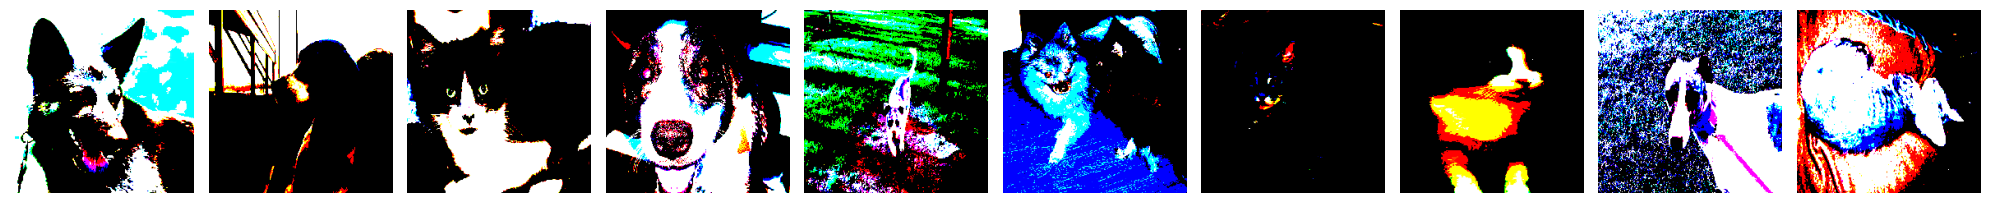

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [7]:
plotImages(imgs)
print(labels)

In [29]:
model= Sequential(
    [
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3),activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
]
)

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dense_2 (Dense)             (None, 2)                

In [31]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
101/101 - 39s - loss: 16.7427 - accuracy: 0.5357 - val_loss: 3.9290 - val_accuracy: 0.6474 - 39s/epoch - 382ms/step
Epoch 2/10
101/101 - 33s - loss: 2.0760 - accuracy: 0.7768 - val_loss: 3.9530 - val_accuracy: 0.5641 - 33s/epoch - 324ms/step
Epoch 3/10
101/101 - 27s - loss: 0.5108 - accuracy: 0.8879 - val_loss: 4.5223 - val_accuracy: 0.5256 - 27s/epoch - 267ms/step
Epoch 4/10
101/101 - 35s - loss: 0.1287 - accuracy: 0.9563 - val_loss: 2.1431 - val_accuracy: 0.6538 - 35s/epoch - 343ms/step
Epoch 5/10
101/101 - 29s - loss: 0.0591 - accuracy: 0.9802 - val_loss: 3.3644 - val_accuracy: 0.5641 - 29s/epoch - 288ms/step
Epoch 6/10
101/101 - 25s - loss: 0.0120 - accuracy: 0.9970 - val_loss: 2.3300 - val_accuracy: 0.6346 - 25s/epoch - 247ms/step
Epoch 7/10
101/101 - 29s - loss: 7.0385e-04 - accuracy: 1.0000 - val_loss: 2.1374 - val_accuracy: 0.6731 - 29s/epoch - 283ms/step
Epoch 8/10
101/101 - 26s - loss: 4.2763e-04 - accuracy: 1.0000 - val_loss: 2.1444 - val_accuracy: 0.6603 - 26s/ep

# Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

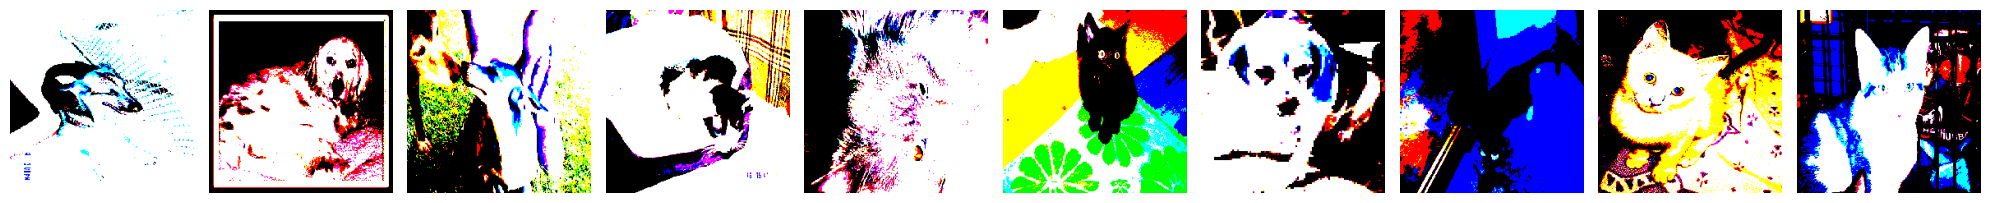

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [12]:
test_imgs, test_labels= next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [13]:
predictions= model.predict(x= test_batches, verbose=0)
predictions

array([[3.02417530e-03, 9.96975780e-01],
       [3.66219494e-04, 9.99633789e-01],
       [2.80468685e-05, 9.99971986e-01],
       [9.88347590e-01, 1.16524417e-02],
       [9.98622060e-01, 1.37800025e-03],
       [7.36115224e-10, 1.00000000e+00],
       [6.17368340e-01, 3.82631630e-01],
       [1.06127136e-05, 9.99989390e-01],
       [1.06105813e-06, 9.99998927e-01],
       [9.88173068e-01, 1.18269501e-02],
       [2.54782438e-01, 7.45217562e-01],
       [3.66333246e-01, 6.33666694e-01],
       [5.14193811e-03, 9.94858027e-01],
       [9.99976277e-01, 2.36971246e-05],
       [9.99999881e-01, 7.72019959e-08],
       [5.06255686e-01, 4.93744344e-01],
       [2.40749046e-01, 7.59250998e-01],
       [3.63602776e-05, 9.99963641e-01],
       [8.17161947e-02, 9.18283820e-01],
       [6.10954176e-09, 1.00000000e+00],
       [9.41691875e-01, 5.83081841e-02],
       [9.99755442e-01, 2.44530820e-04],
       [9.99987721e-01, 1.22818119e-05],
       [5.34049093e-07, 9.99999523e-01],
       [1.548047

In [14]:
import numpy as np
np.round(predictions)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [ ]:
cm= confusion_matrix(y_true=test_batches.classes, y_pred= np.argmax(predictions, axis=-1))
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_batches.classes)
disp.plot()

In [15]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
predictions= model.predict(x= test_batches, verbose=0)

In [17]:
np.round(predictions)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [18]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

# VGG16 Model

In [19]:
vgg16_model= tf.keras.applications.vgg16.VGG16() # Importing or Downloading ...

In [20]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
type(vgg16_model)

keras.src.engine.functional.Functional

In [22]:
model= Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [24]:
for layer in model.layers:
    layer.trainable= False

In [25]:
model.add(Dense(units=2, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

# Train and Fined-Tune the VGG16 Model

In [27]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(x=train_batches, validation_data=test_batches, epochs=10, verbose=2)

Epoch 1/10
101/101 - 314s - loss: 0.3657 - accuracy: 0.8383 - val_loss: 0.1305 - val_accuracy: 0.9405 - 314s/epoch - 3s/step
Epoch 2/10
101/101 - 282s - loss: 0.0802 - accuracy: 0.9692 - val_loss: 0.0957 - val_accuracy: 0.9524 - 282s/epoch - 3s/step
Epoch 3/10
101/101 - 278s - loss: 0.0507 - accuracy: 0.9841 - val_loss: 0.0841 - val_accuracy: 0.9762 - 278s/epoch - 3s/step
Epoch 4/10
101/101 - 274s - loss: 0.0390 - accuracy: 0.9921 - val_loss: 0.0775 - val_accuracy: 0.9702 - 274s/epoch - 3s/step
Epoch 5/10
101/101 - 275s - loss: 0.0303 - accuracy: 0.9931 - val_loss: 0.0761 - val_accuracy: 0.9762 - 275s/epoch - 3s/step
Epoch 6/10
101/101 - 273s - loss: 0.0244 - accuracy: 0.9950 - val_loss: 0.0725 - val_accuracy: 0.9702 - 273s/epoch - 3s/step
Epoch 7/10


KeyboardInterrupt: 

In [ ]:
assert model.history.history.get('accuracy')[-1] > 0.95

In [ ]:
vgg16_prediction= model.predict(x=test_batches, verbose=0)

In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
vgg16_cm= confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(vgg16_prediction, axis=-1))

In [ ]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

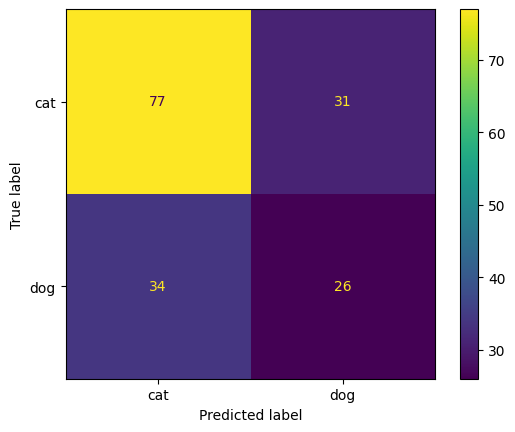

In [ ]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming vgg16_cm is your confusion matrix
# and test_batches.class_indices gives you the correct class labels

# Create display_labels from test_batches.class_indices
display_labels = list(test_batches.class_indices.keys())

# Ensure the number of display labels matches the dimensions of the confusion matrix
assert len(display_labels) == vgg16_cm.shape[0], "Number of display labels must match the dimensions of the confusion matrix."

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=vgg16_cm, display_labels=display_labels)
disp.plot()


# Let's save the model

In [55]:
model.save('cat-vs-dog.h5')

In [49]:
from tensorflow.keras.models import load_model # type: ignore

model= load_model('model/catvsdog.h5')

# Let's predict if my model is a cat or dog

In [56]:
import numpy as np
from tensorflow.keras.preprocessing import image # type: ignore
from tensorflow.keras.applications.vgg16 import preprocess_input # type: ignore


# Load the image
img_path = 'D:\Projects\WorkSpace\Deep Learning\dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))  

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  
img_array = preprocess_input(img_array)


In [57]:
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

translate= {0:"cat", 1:"dog"}
print("Predicted class is a:", translate[predicted_class[0]])

1/1 [==============================] - 0s 126ms/step
Predicted class is a: dog
